In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Pclass'].unique()

array([3, 2, 1])

In [ ]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Text(0.5, 1.0, 'Survival by Sex')

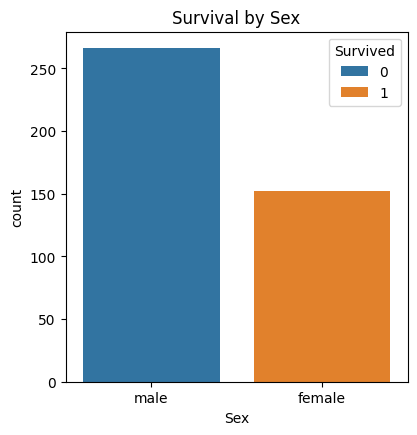

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')

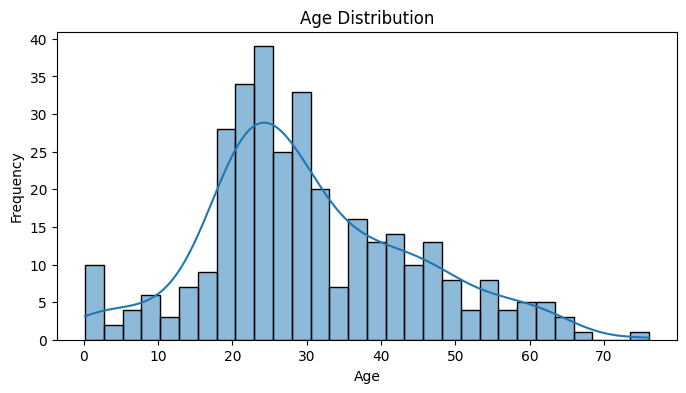

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

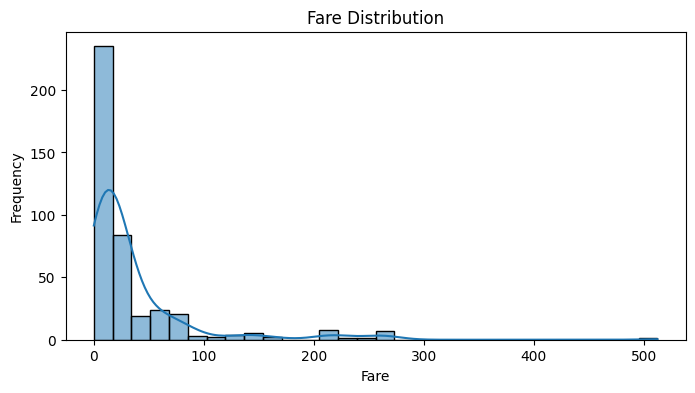

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare']=df['Fare'].fillna(df['Fare'].median())
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'female': 1})

In [ ]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,34.5,0,0,7.8292,True,False,False,True
1,1,1,47.0,1,0,7.0000,False,True,False,True
2,0,0,62.0,0,0,9.6875,True,False,True,False
3,0,0,27.0,0,0,8.6625,False,True,False,True
4,1,1,22.0,1,1,12.2875,False,True,False,True


In [ ]:
X = df.drop(columns = 'Survived')
y = df['Survived']

In [ ]:
print(X)

     Sex   Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S  Pclass_2  \
0      0  34.5      0      0    7.8292        True       False     False   
1      1  47.0      1      0    7.0000       False        True     False   
2      0  62.0      0      0    9.6875        True       False      True   
3      0  27.0      0      0    8.6625       False        True     False   
4      1  22.0      1      1   12.2875       False        True     False   
..   ...   ...    ...    ...       ...         ...         ...       ...   
413    0  27.0      0      0    8.0500       False        True     False   
414    1  39.0      0      0  108.9000       False       False     False   
415    0  38.5      0      0    7.2500       False        True     False   
416    0  27.0      0      0    8.0500       False        True     False   
417    0  27.0      1      1   22.3583       False       False     False   

     Pclass_3  
0        True  
1        True  
2       False  
3        True  
4      

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Xtrain_Scaled = scalar.fit_transform(X_train)
X_test_Scaled = scalar.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model  = Sequential()
model.add(Dense(16, activation='relu', input_dim=Xtrain_Scaled.shape[1] ))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(Xtrain_Scaled, y_train, batch_size = 32, epochs=10, validation_data=(X_test_Scaled, y_test))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5474 - loss: 0.6993 - val_accuracy: 0.7381 - val_loss: 0.6126
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5676 - loss: 0.6645 - val_accuracy: 0.8095 - val_loss: 0.5799
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7513 - loss: 0.5824 - val_accuracy: 0.8333 - val_loss: 0.5511
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7855 - loss: 0.5645 - val_accuracy: 0.8929 - val_loss: 0.5229
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7997 - loss: 0.5342 - val_accuracy: 0.8929 - val_loss: 0.4974
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8125 - loss: 0.5045 - val_accuracy: 0.8929 - val_loss: 0.4739
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8478 - loss: 0.4648 - val_accuracy: 0.8810 - val_loss: 0.4521
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8278 - loss: 0.4662 - val_accuracy: 0.8810 - v

In [ ]:
y_pred = model.predict(X_test_Scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  1]
 [ 5 21]]


0.9285714285714286

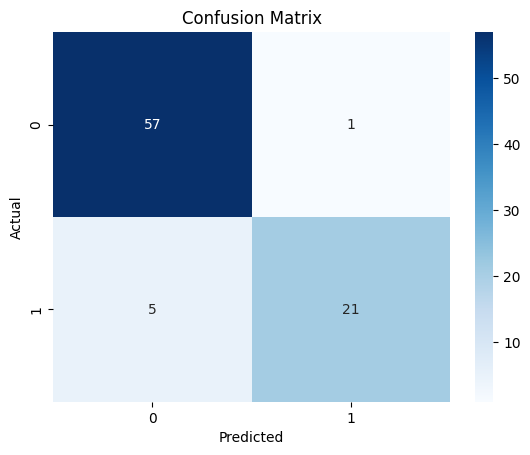

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.95      0.81      0.88        26

    accuracy                           0.93        84
   macro avg       0.94      0.90      0.91        84
weighted avg       0.93      0.93      0.93        84

